In [1]:
#dependancy
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
price_file=os.path.join("pricepersqft.csv")
price_df=pd.read_csv(price_file)
#get all data
price_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,1.872
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.578,1.578,1.580,1.582,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,2.064
2,17426,Chicago,Chicago,Cook,IL,3,1.244,1.248,1.254,1.254,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,1.374
3,39051,Houston,Houston,Harris,TX,4,0.788,0.784,0.784,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,0.974
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.858,0.858,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,0.974


In [3]:
#drop columns with nan
price_df.drop(price_df.columns[6:20], axis=1, inplace=True)
del price_df["January 2017"]
price_df

,City Code,City,Metro,County,State,Population Rank,January 2012,February 2012,March 2012,April 2012,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,6181,New York,New York,Queens,NY,1,1.388,1.392,1.396,1.402,...,1.804,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.590,1.588,1.588,1.588,...,1.978,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056
2,17426,Chicago,Chicago,Cook,IL,3,1.176,1.174,1.174,1.176,...,1.346,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376
3,39051,Houston,Houston,Harris,TX,4,0.776,0.780,0.782,0.786,...,0.982,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.860,0.862,...,0.944,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,0.754,0.754,0.752,0.752,...,0.856,0.862,0.870,0.876,0.880,0.882,0.884,0.886,0.890,0.892
6,18959,Las Vegas,Las Vegas,Clark,NV,7,0.728,0.724,0.724,0.722,...,0.764,0.768,0.770,0.772,0.774,0.772,0.774,0.774,0.778,0.780
7,6915,San Antonio,San Antonio,Bexar,TX,8,0.690,0.692,0.694,0.696,...,0.816,0.820,0.822,0.824,0.822,0.822,0.822,0.824,0.830,0.834
8,54296,San Diego,San Diego,San Diego,CA,9,1.492,1.492,1.488,1.486,...,1.760,1.772,1.782,1.788,1.792,1.794,1.796,1.802,1.808,1.814
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,0.814,0.814,0.814,0.814,...,1.020,1.026,1.034,1.040,1.046,1.048,1.050,1.054,1.060,1.062


In [4]:
# sort populations ranks and assign urban, suburban and rural;
#urban up to 100
#suburban upto 2000
#rural >2000
#make loop in order to add in these conditions
city_type=[]
for i in range(len(price_df["Population Rank"]-1)):
    if price_df["Population Rank"][i] <= 100:
        city_type.append("Urban")
    elif price_df["Population Rank"][i] > 100 and price_df["Population Rank"][i] <= 2000:
        city_type.append("Suburban")
    else:
        city_type.append("Rural")
price_df["City Type"]=city_type
price_df.head(10)

,City Code,City,Metro,County,State,Population Rank,January 2012,February 2012,March 2012,April 2012,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,City Type
0,6181,New York,New York,Queens,NY,1,1.388,1.392,1.396,1.402,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,Urban
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,1.590,1.588,1.588,1.588,...,1.990,2.004,2.018,2.026,2.032,2.038,2.042,2.048,2.056,Urban
2,17426,Chicago,Chicago,Cook,IL,3,1.176,1.174,1.174,1.176,...,1.354,1.362,1.370,1.374,1.378,1.380,1.380,1.380,1.376,Urban
3,39051,Houston,Houston,Harris,TX,4,0.776,0.780,0.782,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,Urban
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,0.854,0.858,0.860,0.862,...,0.948,0.956,0.962,0.964,0.964,0.966,0.968,0.972,0.974,Urban
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,0.754,0.754,0.752,0.752,...,0.862,0.870,0.876,0.880,0.882,0.884,0.886,0.890,0.892,Urban
6,18959,Las Vegas,Las Vegas,Clark,NV,7,0.728,0.724,0.724,0.722,...,0.768,0.770,0.772,0.774,0.772,0.774,0.774,0.778,0.780,Urban
7,6915,San Antonio,San Antonio,Bexar,TX,8,0.690,0.692,0.694,0.696,...,0.820,0.822,0.824,0.822,0.822,0.822,0.824,0.830,0.834,Urban
8,54296,San Diego,San Diego,San Diego,CA,9,1.492,1.492,1.488,1.486,...,1.772,1.782,1.788,1.792,1.794,1.796,1.802,1.808,1.814,Urban
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,0.814,0.814,0.814,0.814,...,1.026,1.034,1.040,1.046,1.048,1.050,1.054,1.060,1.062,Urban


In [5]:
#Select metro areas of intrest
price_df_selected=price_df.loc[(price_df["Metro"]=="San Francisco") | 
                      (price_df["Metro"]=="San Jose") | (price_df["Metro"]=="Houston") |
                      (price_df["State"]=="NY") & (price_df["Metro"]=="New York")]
                       
price_df_selected

,City Code,City,Metro,County,State,Population Rank,January 2012,February 2012,March 2012,April 2012,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,City Type
0,6181,New York,New York,Queens,NY,1,1.388,1.392,1.396,1.402,...,1.806,1.810,1.816,1.824,1.828,1.836,1.844,1.858,1.866,Urban
3,39051,Houston,Houston,Harris,TX,4,0.776,0.780,0.782,0.786,...,0.984,0.984,0.982,0.980,0.976,0.974,0.974,0.976,0.976,Urban
10,33839,San Jose,San Jose,Santa Clara,CA,11,1.568,1.572,1.582,1.592,...,2.224,2.234,2.242,2.246,2.246,2.240,2.232,2.224,2.210,Urban
12,20330,San Francisco,San Francisco,San Francisco,CA,13,2.272,2.298,2.330,2.354,...,3.594,3.590,3.588,3.580,3.564,3.542,3.518,3.498,3.466,Urban
42,13072,Oakland,San Francisco,Alameda,CA,43,1.480,1.480,1.478,1.478,...,2.212,2.244,2.276,2.300,2.318,2.330,2.344,2.356,2.360,Urban
102,11540,Fremont,San Francisco,Alameda,CA,103,1.504,1.510,1.512,1.514,...,2.176,2.198,2.214,2.220,2.218,2.214,2.208,2.202,2.192,Suburban
148,34937,Yonkers,New York,Westchester,NY,149,1.582,1.584,1.584,1.588,...,1.806,1.822,1.838,1.846,1.848,1.854,1.866,1.884,1.900,Suburban
149,18518,Hayward,San Francisco,Alameda,CA,150,1.332,1.342,1.356,1.374,...,1.942,1.954,1.972,1.988,2.004,2.018,2.024,2.028,2.024,Suburban
194,54626,Sunnyvale,San Jose,Santa Clara,CA,195,1.846,1.850,1.850,1.852,...,2.574,2.584,2.594,2.600,2.600,2.592,2.582,2.572,2.558,Suburban
199,19865,Pasadena,Houston,Harris,TX,200,0.724,0.724,0.724,0.726,...,0.906,0.908,0.908,0.910,0.912,0.916,0.918,0.922,0.920,Suburban


In [6]:
#clean data set and make averages, make new data frame for cleaned data

Data_Price_Clean=pd.DataFrame(price_df_selected["City"])
Data_Price_Clean["State"]=price_df_selected["State"]                            
Data_Price_Clean["Metro"]=price_df_selected["Metro"]
Data_Price_Clean["City Type"]=price_df_selected["City Type"]

#get averages for each year

Data_Price_Clean["Average 2012"]=price_df_selected.loc[:,"January 2012":"December 2012"].mean(axis=1)
Data_Price_Clean["Average 2013"]=price_df_selected.loc[:,"January 2013":"December 2013"].mean(axis=1)
Data_Price_Clean["Average 2014"]=price_df_selected.loc[:,"January 2014":"December 2014"].mean(axis=1)
Data_Price_Clean["Average 2015"]=price_df_selected.loc[:,"January 2015":"December 2015"].mean(axis=1)
Data_Price_Clean["Average 2016"]=price_df_selected.loc[:,"January 2016":"December 2016"].mean(axis=1)

Data_Price_Clean.head()

,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016
0,New York,NY,New York,Urban,1.416833,1.514667,1.631000,1.741333,1.823833
3,Houston,TX,Houston,Urban,0.789167,0.834000,0.895667,0.966500,0.978667
10,San Jose,CA,San Jose,Urban,1.606000,1.692667,1.816500,2.081000,2.225000
12,San Francisco,CA,San Francisco,Urban,2.343167,2.513000,2.858833,3.385667,3.566167
42,Oakland,CA,San Francisco,Urban,1.469500,1.507667,1.675667,1.996667,2.271167


In [7]:
#Check values counts 
Data_Price_Clean["State"].value_counts()

NY    220
CA    105
TX    103
Name: State, dtype: int64

In [8]:
#clean NaN out from data set
Data_Price_Clean=Data_Price_Clean.dropna(axis=1)
Data_Price_Clean["State"].value_counts()

NY    220
CA    105
TX    103
Name: State, dtype: int64

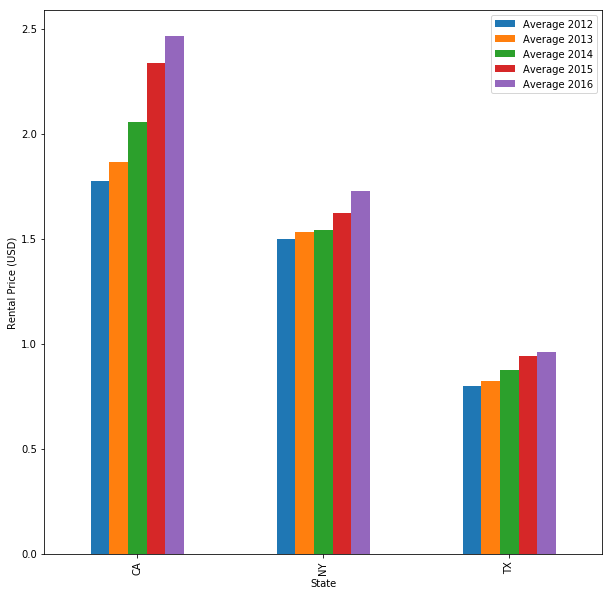

In [9]:
#group by  state ; plot state to state comparison data
Data_Price_Clean_State_Only=Data_Price_Clean.groupby(["State"]).mean()
Data_Price_Clean_State_Only
Data_Price_Clean_State_Only.plot(kind="bar", figsize=(10,10))
plt.ylabel("Rental Price (USD)")
plt.show()

In [10]:
#group by city type and state ; plot state to state comparison data
Data_Price_Clean_State_Comp=Data_Price_Clean.groupby(["State", "City Type"]).mean()
Data_Price_Clean_State_Comp

Average 2012  Average 2013  Average 2014  Average 2015  \
State City Type                                                           
CA    Rural          1.921544      2.023282      2.237789      2.539340   
      Suburban       1.641755      1.718239      1.888035      2.146343   
      Urban          1.806222      1.904444      2.117000      2.487778   
NY    Rural          1.493476      1.523959      1.533188      1.615169   
      Suburban       1.531867      1.595522      1.589894      1.680061   
      Urban          1.416833      1.514667      1.631000      1.741333   
TX    Rural          0.814314      0.840949      0.895293      0.966895   
      Suburban       0.744964      0.770348      0.810399      0.857616   
      Urban          0.789167      0.834000      0.895667      0.966500   

                 Average 2016  
State City Type                
CA    Rural          2.668139  
      Suburban       2.265708  
      Urban          2.687444  
NY    Rural          1.718949  
      Suburban       1.799600  
      Urban          1.823833  
TX    Rural          0.988734  
      Suburban       0.870870  
      Urban          0.978667

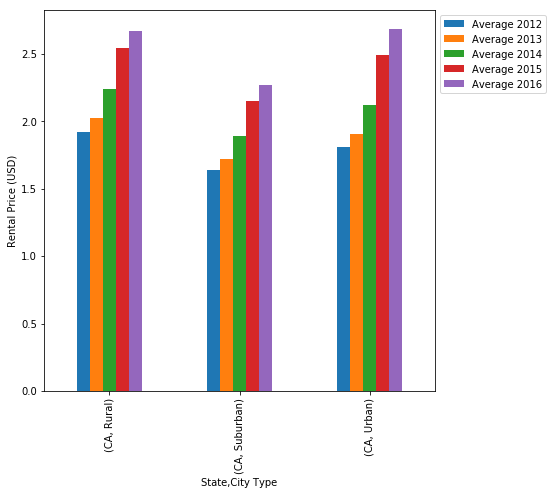

In [11]:
#plot CA values on bar graph
Data_Price_Clean_State_Comp.iloc[:3].plot(kind="bar", figsize=(7,7))
plt.ylabel("Rental Price (USD)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

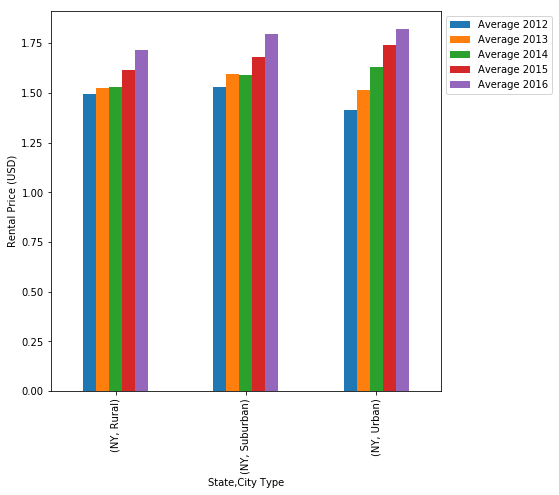

In [12]:
#plot NY
Data_Price_Clean_State_Comp.iloc[3:6].plot(kind="bar", figsize=(7,7))
plt.ylabel("Rental Price (USD)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

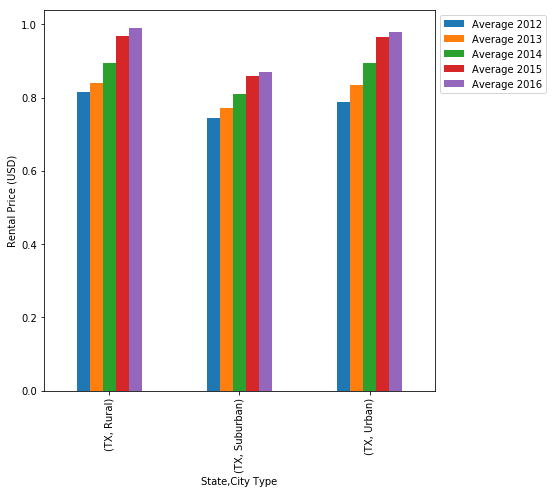

In [13]:
#plot TX
Data_Price_Clean_State_Comp.iloc[6:9].plot(kind="bar", figsize=(7,7))
plt.ylabel("Rental Price (USD)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [14]:
Data_Price_Clean_Overall_Increase=Data_Price_Clean
Data_Price_Clean_Overall_Increase["Overall % Increase"]=round(100*((Data_Price_Clean["Average 2016"]-Data_Price_Clean["Average 2012"])/Data_Price_Clean["Average 2016"]),2)

Data_Price_Clean_Overall_Increase.head()


,City,State,Metro,City Type,Average 2012,Average 2013,Average 2014,Average 2015,Average 2016,Overall % Increase
0,New York,NY,New York,Urban,1.416833,1.514667,1.631000,1.741333,1.823833,22.32
3,Houston,TX,Houston,Urban,0.789167,0.834000,0.895667,0.966500,0.978667,19.36
10,San Jose,CA,San Jose,Urban,1.606000,1.692667,1.816500,2.081000,2.225000,27.82
12,San Francisco,CA,San Francisco,Urban,2.343167,2.513000,2.858833,3.385667,3.566167,34.29
42,Oakland,CA,San Francisco,Urban,1.469500,1.507667,1.675667,1.996667,2.271167,35.30


In [15]:
#clean data set and make averages, make new data frame for cleaned data

overall_increase=pd.DataFrame(Data_Price_Clean_Overall_Increase["City"])
overall_increase["State"]=Data_Price_Clean_Overall_Increase["State"]                          
overall_increase["Metro"]=Data_Price_Clean_Overall_Increase["Metro"]
overall_increase["City Type"]=Data_Price_Clean_Overall_Increase["City Type"]
overall_increase['Overall % Increase']=Data_Price_Clean_Overall_Increase['Overall % Increase']

overall_increase.head()

,City,State,Metro,City Type,Overall % Increase
0,New York,NY,New York,Urban,22.32
3,Houston,TX,Houston,Urban,19.36
10,San Jose,CA,San Jose,Urban,27.82
12,San Francisco,CA,San Francisco,Urban,34.29
42,Oakland,CA,San Francisco,Urban,35.30


In [16]:
#state to state comparison data for overall % increase
Data_Perc_Clean_State_Comp=overall_increase.groupby(["State", "City Type"]).mean()
Data_Perc_Clean_State_Comp

Overall % Increase
State City Type                    
CA    Rural               27.144490
      Suburban            26.936038
      Urban               32.470000
NY    Rural               12.547513
      Suburban            14.665000
      Urban               22.320000
TX    Rural               16.387089
      Suburban            14.278261
      Urban               19.360000

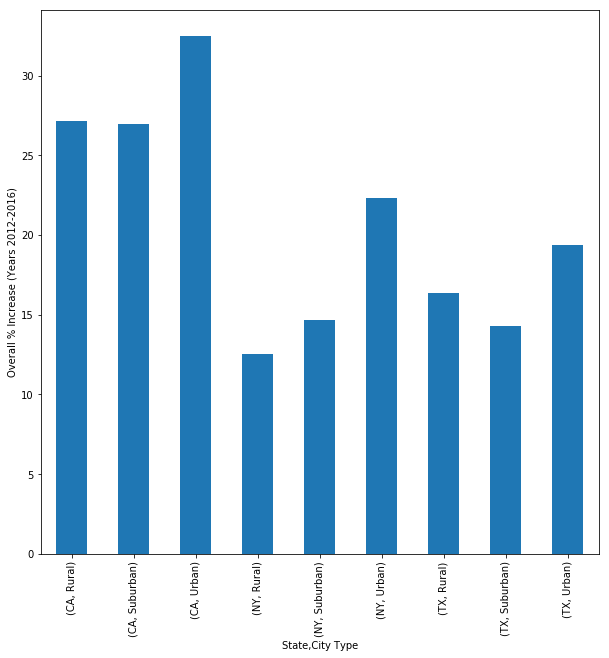

In [17]:
# % increase comparison across states... don't know why this isn't grouped and colored nicely like the previous graphs??
Data_Perc_Clean_State_Comp.plot(kind='bar', figsize=(10,10), legend=False)
plt.ylabel("Overall % Increase (Years 2012-2016)")
plt.show()

In [18]:
top_five_nyc_urban = overall_increase.loc[overall_increase['State']=='NY'].loc[overall_increase['City Type']=='Urban'].head().set_index(['City'])
top_five_nyc_urban

,State,Metro,City Type,Overall % Increase
City,,,,
New York,NY,New York,Urban,22.32


In [45]:
#top 5 suburban NY overall % increase
top_five_nyc_suburban = overall_increase.loc[overall_increase['State']=='NY'].loc[overall_increase['City Type']=='Suburban']
top_five_nyc_suburban=top_five_nyc_suburban.sort_values('Overall % Increase', ascending=False).head().set_index(['City'])
top_five_nyc_suburban

,State,Metro,City Type,Overall % Increase
City,,,,
Commack,NY,New York,Suburban,30.50
Centereach,NY,New York,Suburban,28.15
Elmont,NY,New York,Suburban,17.95
Great Neck,NY,New York,Suburban,17.18
Valley Stream,NY,New York,Suburban,16.50


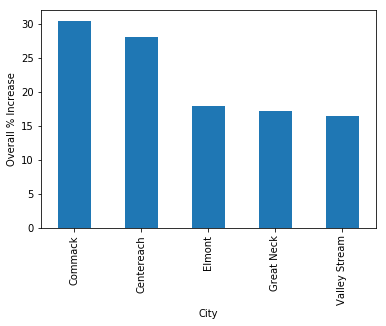

In [46]:
top_five_nyc_suburban.plot(kind='bar', legend=False)
plt.ylabel("Overall % Increase")
plt.xlabel("City")
plt.show()

In [20]:
#top 5 suburban NY by population
#no correlation between pop and overall % increase
topfive_nycpop_suburban = overall_increase.loc[overall_increase['State']=='NY'].loc[overall_increase['City Type']=='Suburban']
topfive_nycpop_suburban.head()


,City,State,Metro,City Type,Overall % Increase
148,Yonkers,NY,New York,Suburban,13.59
437,Town of Poughkeepsie,NY,New York,Suburban,7.78
554,New Rochelle,NY,New York,Suburban,13.78
656,Mount Vernon,NY,New York,Suburban,16.03
700,Valley Stream,NY,New York,Suburban,16.50


In [21]:
#top 5 rural NY overall % increase
top_five_nyc_rural = overall_increase.loc[overall_increase['State']=='NY'].loc[overall_increase['City Type']=='Rural']
top_five_nyc_rural=top_five_nyc_rural.sort_values('Overall % Increase', ascending=False).head().set_index(['City'])
top_five_nyc_rural

,State,Metro,City Type,Overall % Increase
City,,,,
Stony Brook,NY,New York,Rural,33.28
Lake Grove,NY,New York,Rural,32.77
Nesconset,NY,New York,Rural,31.31
Farmingville,NY,New York,Rural,31.15
Saint James,NY,New York,Rural,29.98


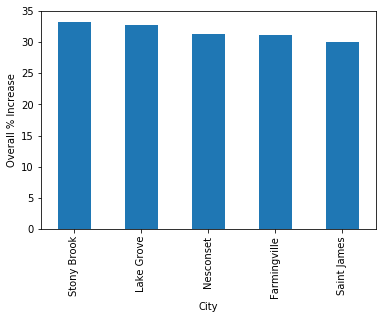

In [47]:
top_five_nyc_rural.plot(kind='bar', legend=False)
plt.ylabel("Overall % Increase")
plt.xlabel("City")
plt.show()

In [22]:
#top 5 rural NY by population
#no correlation between pop and overall % increase
topfive_nycpop_rural = overall_increase.loc[overall_increase['State']=='NY'].loc[overall_increase['City Type']=='Rural']
topfive_nycpop_rural.head()

,City,State,Metro,City Type,Overall % Increase
2003,Smithtown,NY,New York,Rural,29.71
2014,Franklin Square,NY,New York,Rural,16.61
2049,Garden City,NY,New York,Rural,16.32
2059,Rockville Centre,NY,New York,Rural,15.06
2096,Stony Brook,NY,New York,Rural,33.28


In [23]:
top_five_ca_urban = overall_increase.loc[overall_increase['State']=='CA'].loc[overall_increase['City Type']=='Urban']
top_five_ca_urban=top_five_ca_urban.sort_values('Overall % Increase', ascending=False).head().set_index(['City'])
top_five_ca_urban

,State,Metro,City Type,Overall % Increase
City,,,,
Oakland,CA,San Francisco,Urban,35.30
San Francisco,CA,San Francisco,Urban,34.29
San Jose,CA,San Jose,Urban,27.82


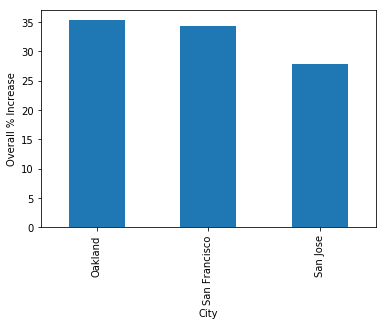

In [24]:
top_five_ca_urban.plot(kind='bar', legend=False)
plt.ylabel("Overall % Increase")
plt.xlabel("City")
plt.show()

In [25]:
#top 5 suburban CA by overall % increase
top_five_ca_suburban = overall_increase.loc[overall_increase['State']=='CA'].loc[overall_increase['City Type']=='Suburban']
top_five_ca_suburban=top_five_ca_suburban.sort_values('Overall % Increase', ascending=False).head().set_index(['City'])
top_five_ca_suburban

,State,Metro,City Type,Overall % Increase
City,,,,
Berkeley,CA,San Francisco,Suburban,34.92
Alameda,CA,San Francisco,Suburban,33.13
Richmond,CA,San Francisco,Suburban,31.05
East Palo Alto,CA,San Francisco,Suburban,30.93
Menlo Park,CA,San Francisco,Suburban,30.85


In [26]:
#top 5 suburban CA by population
#no correlation between pop and overall % increase
topfive_capop_suburban = overall_increase.loc[overall_increase['State']=='CA'].loc[overall_increase['City Type']=='Suburban']
topfive_capop_suburban.head()

,City,State,Metro,City Type,Overall % Increase
102,Fremont,CA,San Francisco,Suburban,30.33
149,Hayward,CA,San Francisco,Suburban,29.96
194,Sunnyvale,CA,San Jose,Suburban,27.50
242,Concord,CA,San Francisco,Suburban,25.95
254,Santa Clara,CA,San Jose,Suburban,28.02


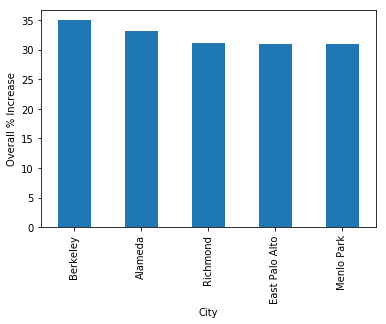

In [27]:
top_five_ca_suburban.plot(kind='bar', legend=False)
plt.ylabel("Overall % Increase")
plt.xlabel("City")
plt.show()

In [28]:
#top 5 rural CA by overall % increase
top_five_ca_rural = overall_increase.loc[overall_increase['State']=='CA'].loc[overall_increase['City Type']=='Rural']
top_five_ca_rural=top_five_ca_rural.sort_values('Overall % Increase', ascending=False).head().set_index(['City'])
top_five_ca_rural

,State,Metro,City Type,Overall % Increase
City,,,,
Stinson Beach,CA,San Francisco,Rural,36.72
Emeryville,CA,San Francisco,Rural,35.63
Albany,CA,San Francisco,Rural,34.40
Belvedere,CA,San Francisco,Rural,33.67
Atherton,CA,San Francisco,Rural,31.81


In [29]:
#top 5 rural CA by population
#no correlation between pop and overall % increase
topfive_capop_suburban = overall_increase.loc[overall_increase['State']=='CA'].loc[overall_increase['City Type']=='Rural']
topfive_capop_suburban.head()

,City,State,Metro,City Type,Overall % Increase
2132,Millbrae,CA,San Francisco,Rural,26.49
2137,Lafayette,CA,San Francisco,Rural,21.40
2392,El Sobrante,CA,San Francisco,Rural,27.42
2408,Albany,CA,San Francisco,Rural,34.40
2679,Alamo,CA,San Francisco,Rural,20.40


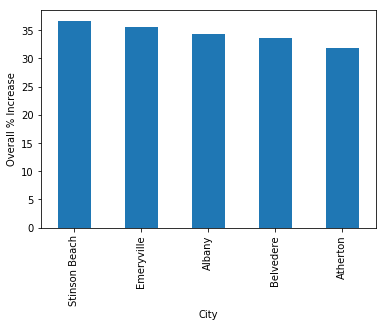

In [30]:
top_five_ca_rural.plot(kind='bar', legend=False)
plt.ylabel("Overall % Increase")
plt.xlabel("City")
plt.show()

In [31]:
top_five_tx_urban = overall_increase.loc[overall_increase['State']=='TX'].loc[overall_increase['City Type']=='Urban'].head().set_index(['City'])
top_five_tx_urban

,State,Metro,City Type,Overall % Increase
City,,,,
Houston,TX,Houston,Urban,19.36


In [32]:
#top 5 suburban TX by overall % increase
top_five_tx_suburban = overall_increase.loc[overall_increase['State']=='TX'].loc[overall_increase['City Type']=='Suburban']
top_five_tx_suburban=top_five_tx_suburban.sort_values('Overall % Increase', ascending=False).head().set_index(['City'])
top_five_tx_suburban

,State,Metro,City Type,Overall % Increase
City,,,,
Galveston,TX,Houston,Suburban,24.35
Lake Jackson,TX,Houston,Suburban,19.32
Pasadena,TX,Houston,Suburban,19.11
Texas City,TX,Houston,Suburban,17.38
Channelview,TX,Houston,Suburban,16.62


In [33]:
#top 5 suburban TX by population
#no correlation between pop and overall % increase
topfive_capop_suburban = overall_increase.loc[overall_increase['State']=='TX'].loc[overall_increase['City Type']=='Suburban']
topfive_capop_suburban.head()

,City,State,Metro,City Type,Overall % Increase
199,Pasadena,TX,Houston,Suburban,19.11
204,Sugar Land,TX,Houston,Suburban,9.58
256,Cypress,TX,Houston,Suburban,12.30
257,Conroe,TX,Houston,Suburban,12.80
419,Pearland,TX,Houston,Suburban,13.86


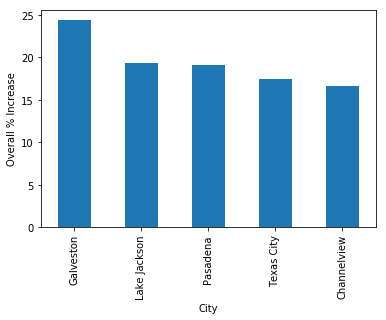

In [34]:
top_five_tx_suburban.plot(kind='bar', legend=False)
plt.ylabel("Overall % Increase")
plt.xlabel("City")
plt.show()

In [35]:
#top 5 rural TX by overall % increase
top_five_tx_rural = overall_increase.loc[overall_increase['State']=='TX'].loc[overall_increase['City Type']=='Rural']
top_five_tx_rural=top_five_tx_rural.sort_values('Overall % Increase', ascending=False).head().set_index(['City'])
top_five_tx_rural

,State,Metro,City Type,Overall % Increase
City,,,,
Bunker Hill Village,TX,Houston,Rural,34.78
Hunters Creek Village,TX,Houston,Rural,31.78
West University Place,TX,Houston,Rural,29.13
Freeport,TX,Houston,Rural,26.88
Liverpool,TX,Houston,Rural,24.22


In [36]:
#top 5 rural TX by population
#no correlation between pop and overall % increase
topfive_capop_rural = overall_increase.loc[overall_increase['State']=='TX'].loc[overall_increase['City Type']=='Rural']
topfive_capop_rural.head()

,City,State,Metro,City Type,Overall % Increase
2044,Crosby,TX,Houston,Rural,15.68
2131,Alvin,TX,Houston,Rural,16.43
2283,Cloverleaf,TX,Houston,Rural,16.16
2606,South Houston,TX,Houston,Rural,20.90
2649,Bellaire,TX,Houston,Rural,21.85


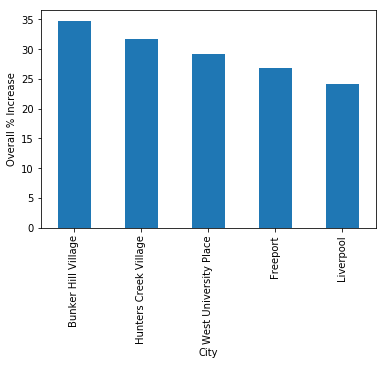

In [37]:
top_five_tx_rural.plot(kind='bar', legend=False)
plt.ylabel("Overall % Increase")
plt.xlabel("City")
plt.show()

In [38]:
#make line graph for city type for each area(SF)
sf_city_type_df=Data_Price_Clean_Overall_Increase
del sf_city_type_df["Overall % Increase"]
sf_city_type_df=sf_city_type_df.loc[Data_Price_Clean_Overall_Increase["State"]=="CA"]
sf_city_type_df=sf_city_type_df.groupby(["City Type"]).mean()

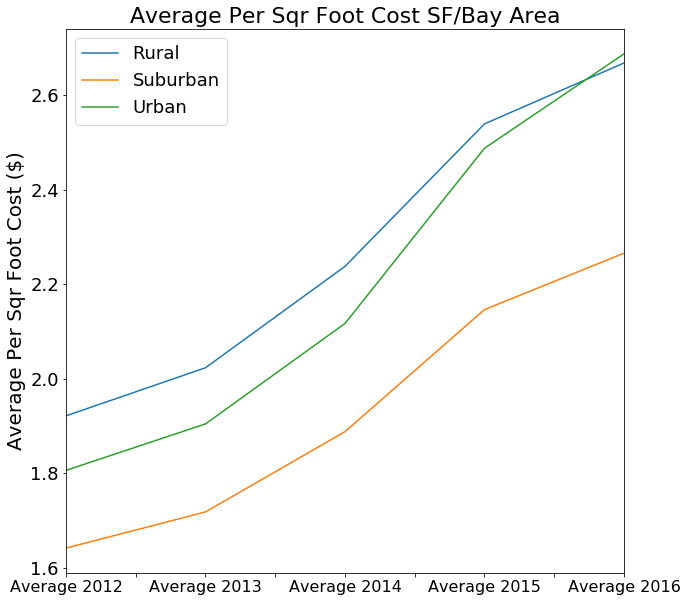

In [39]:
#transform data so that it can be graphed 
sf_city_type_df_t=sf_city_type_df.T
sf_city_type_df_t=sf_city_type_df_t.reset_index()
sf_city_type_df_t.plot("index",["Rural","Suburban","Urban"],kind="line", rot=0, figsize=(10,10))
plt.xlabel("")
plt.ylabel("Average Per Sqr Foot Cost ($)", size=20)
plt.title("Average Per Sqr Foot Cost SF/Bay Area", size=22)
plt.xticks(size = 16)
plt.yticks(size = 18)
plt.legend(prop={'size': 18})
plt.savefig('SF_Line_Per_Sqr_Foot_Cost.png')
plt.show()

In [40]:
#make line graph for city type for each area(NY)
NY_city_type_df=Data_Price_Clean_Overall_Increase
#del NY_city_type_df["Overall % Increase"]
NY_city_type_df=NY_city_type_df.loc[Data_Price_Clean_Overall_Increase["State"]=="NY"]
NY_city_type_df=NY_city_type_df.groupby(["City Type"]).mean()

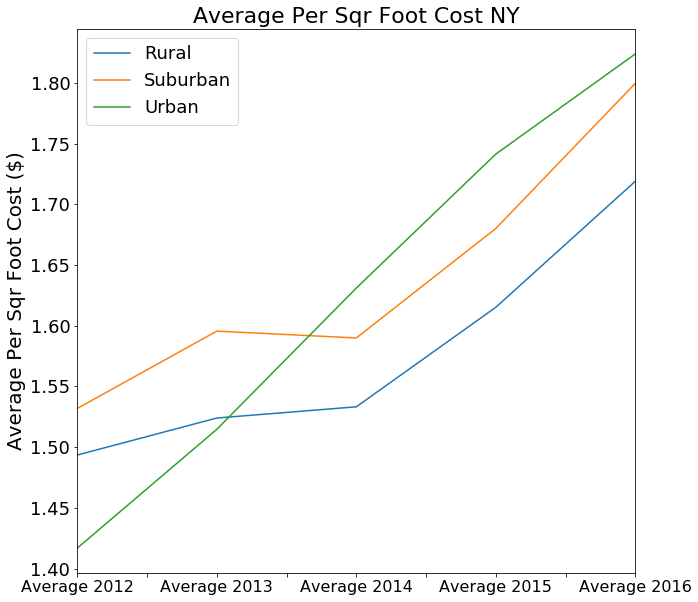

In [41]:
#transform data so that it can be graphed 
NY_city_type_df_t=NY_city_type_df.T
NY_city_type_df_t=NY_city_type_df_t.reset_index()
NY_city_type_df_t.plot("index",["Rural","Suburban","Urban"],kind="line", rot=0, figsize=(10,10))
plt.xlabel("")
plt.ylabel("Average Per Sqr Foot Cost ($)", size=20)
plt.title("Average Per Sqr Foot Cost NY", size=22)
plt.xticks(size = 16)
plt.yticks(size = 18)
plt.legend(prop={'size': 18})
plt.savefig('NY_Line_Per_Sqr_Foot_Cost.png')
plt.show()

In [42]:
NY_city_type_df_t.head()

City Type,index,Rural,Suburban,Urban
0,Average 2012,1.493476,1.531867,1.416833
1,Average 2013,1.523959,1.595522,1.514667
2,Average 2014,1.533188,1.589894,1.631000
3,Average 2015,1.615169,1.680061,1.741333
4,Average 2016,1.718949,1.799600,1.823833


In [43]:
#make line graph for city type for each area(TX)
TX_city_type_df=Data_Price_Clean_Overall_Increase
#del TX_city_type_df["Overall % Increase"]
TX_city_type_df=TX_city_type_df.loc[Data_Price_Clean_Overall_Increase["State"]=="TX"]
TX_city_type_df=TX_city_type_df.groupby(["City Type"]).mean()

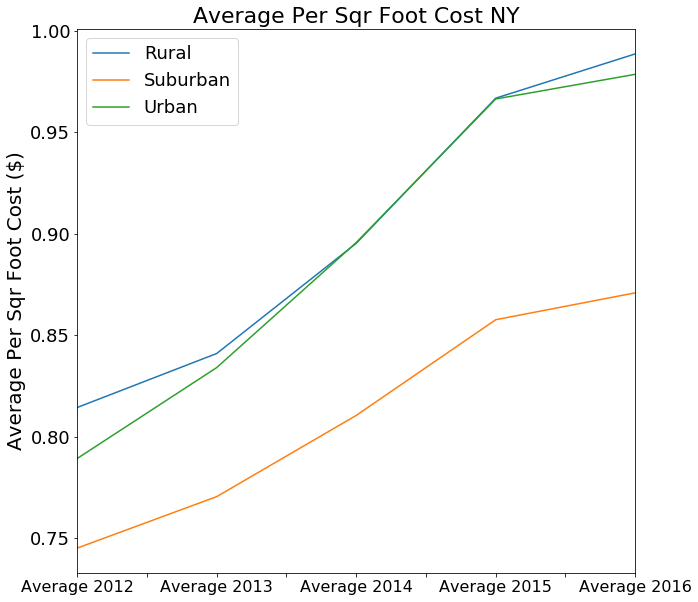

In [44]:
#transform data so that it can be graphed 
TX_city_type_df_t=TX_city_type_df.T
TX_city_type_df_t=TX_city_type_df_t.reset_index()
TX_city_type_df_t.plot("index",["Rural","Suburban","Urban"],kind="line", rot=0, figsize=(10,10))
plt.xlabel("")
plt.ylabel("Average Per Sqr Foot Cost ($)", size=20)
plt.title("Average Per Sqr Foot Cost NY", size=22)
plt.xticks(size = 16)
plt.yticks(size = 18)
plt.legend(prop={'size': 18})
plt.savefig('TX_Line_Per_Sqr_Foot_Cost.png')
plt.show()